# Modulo VII - METRICAS EN MACHINE LEARNING

<font size="4">
<p>El siguiente paso una vez se tenga implementado el modelo es determinar que tan efectivo está siendo para resolver la tarea, si nuestro modelo está capturando los patrones o en otras palabra está aprendiendo de los datos históricos.
</p>

<p>
Teniendo en mente que el objetivo es evaluar la consistencia y efeicacia del modelo, es importante determinar la métrica que se usará para el tipo de problema que tengamos.
</p>

<p>
En éste capitulo haremos un recorrido por las métricas más usadas para lo diferentes problemas como clasificación, regresión, information retrieval.
</p>
<br>

</font>

## Metricas de Clasificación

<font size="4">
<p>Buscamos encontrar la correspondencia de un elemento a un conjunto, a una clase en particulas basándonos en algunos atributos de el individuo.
</p>
<p>
Veamos cómo medir el desempeño de un algoritmo de clasificación con el dataset de IRIS.
</p>
</font>

### Cargar datos y entrenar un SVM con kernel lineal

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Cargar el dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X, y).predict(X)

### Matriz de confusion
<br>
<font size="4">
<p>La matriz de confusión permite la visualización del desempeño de nuestro método comparando los resultados predichos contra los resultados que hacen parte del ground truth.
</p>
<p>Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.</p>
<p>
Con la matriz de confusiòn es fácil ver lo errores de clasificación y en que clase estos ejemplo mal clasificados están cayendo.
<p>
</font>

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusion',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')

# Calcular la matriz de confucion
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

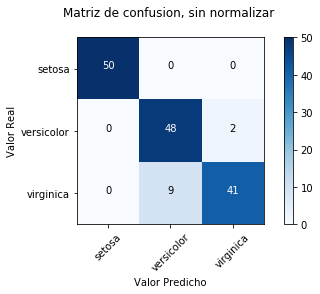

In [3]:
# Dibujar la matriz sin normalizar
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusion, sin normalizar \n')

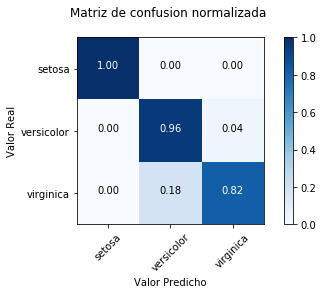

In [4]:
# Dibujar la matriz normalizada, se busca que los valores no superen a 1
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusion normalizada \n')
plt.show()

### Exactitud
<br>
<font size="4">
<p>La exactitud se puede ver como la proporción de casos clasificados correctamente  sobre la totalidad de los casos.
</p>
<p>Es importante tener en cuenta que cuando la proporción de ejemplos de una clase y otra están en desbalance ésta métrica no nos dice mucho.
</p>
<p>Para el ejemplo anterior se calcula la exactitud basandonos en las predicciones y el ground truth, es decir los datos etiquetados que continen la clasifiación correcta.
</p>
</font>

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(y, y_pred )

0.92666666666666664

### Precision

<font size="4">
<p>La exactitud se puede ver como la proporción de ejemplos positivos, si hablamos de dos clases, que fueron correctamente clasificados.
</p>
<p>Es decir la tasa de verdaderos positivos obtenidos por el método usado.
</p>
<p>
</font>

In [6]:
precision_score(y, y_pred, average='macro')

0.93186454508363925

## Métricas de Regresión

<font size="4">
<p>Recordemos que la regresión aprovecha la dependencia estadística entre las variables para predecir o clasificar.
Un modelo estadístico se construye para explicar una variable aleatoria -dependiente- a través de otras variables aleatorias -factores-.
</p>
<p>
A la diferencia entre el valor observado de la variable y el valor predicho  $\hat{y}$ se le llama residuo. La media cuadrática de los residuos es la varianza residual.
</p>
<p>
En éste apartado veremos las métricas que permitén verificar la eficacia de nuestro modelo para la tarea que nos interesa.
</p>
</font>

### Error Cuadrático Medio

<font size="4">
<p>
El error cuadrático medio mide el promedio de los errores al cuadrado, en otras palabras, la diferencia entre el predictor y el valor real. Corresponde al valor esperado de la pérdida del error al cuadrado o pérdida cuadrática. 
</p>
<p>
La diferencia se produce debido a la aleatoriedad y ésta en general está basada en una función de distribución normal.
</p>

$$
ECM = \sqrt{ \frac{1}{N}\sum(Y_{i} - \hat{Y}_{i})^2 }
$$

### Coeficiente de Determinación - Bondad de Ajuste

<font size="4">
<p>
Una buena forma de determinar si el modelo se ajusta bien a los datos es calculado el coeficiente de determinación $R^2$. Este coeficiente mide la correlación cuadrática entre lo los valores observados de $y$ y los valores predichos por el modelo $\hat{y}$.
</p>

$$
R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i}-\bar{y})^2},
$$

<p>En donde la suma sobre todas las observaciones reporta la variación en la variable de predicha que es explicada mediante el modelo de regresión.
</p>

<p>Si la predicción está cerca al valor actual, se espera que el coeficiente de determinación sea cercano a 1. Por el otro lado si las predicciones no están relacionadas con el valor actual, entonces  $R^2 = 0$. En otros casos, $R^2$ se ubica entre 0 y 1.

### Error Estándar

<font size="4">
<p>
Otra medidad que nos dice que tan bueno es nuestro modelo es la desviación estándar de los residuos. Más conocida como el error estándar de la regresión y es calcula de ésta manera.
</p>

$$
s_e=\sqrt{\frac{1}{N-2}\sum_{i=1}^{N}{e_i^2}}
$$

<p>El error estándar está relacionado con el promedio del error producido por el modelo.
</p>

### Ejemplo Regresión Lineal

<font size="4">
<p>En el siguiente ejemplo vamos a ver como se calcula el Error Medio Cuadrado usando sklearn.
</p>
<p>Para éste ejemplo vamos usar un dataset con la altura (cms) y el peso (kgs) de 200 individuos y vamos a encontrar un modelo que nos correlaciones las dos variables con un modelo lineal.
</p>
</font>

In [7]:
import pandas as pd

In [8]:
ph = pd.read_csv('datasets/human-height-weight.csv')

In [9]:
ph.head(5)

id   height_cm   weight_kg
0   0  187.571423  109.720985
1   1  174.706036   73.622732
2   2  188.239668   96.497550
3   3  182.196685   99.809504
4   4  177.499762   93.598619

In [10]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
lin_reg = lm.LinearRegression()

In [12]:
X_train = ph['height_cm'].values[0:150]
y_train = ph['weight_kg'].values[0:150]
X_test = ph['height_cm'].values[150:]
y_test = ph['weight_kg'].values[150:]
#Sklearn necesita recibir un tensor
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)

In [13]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_hat = lin_reg.predict(X_test)

In [15]:
print("El Error Medio Cuadrado es de: %.2f" % mean_squared_error(y_test, y_hat))
print("El Coeficiente de Determinación es de: %.2f" % r2_score(y_test, y_hat, multioutput=None))

El Error Medio Cuadrado es de: 31.96
El Coeficiente de Determinación es de: 0.64


Text(0.5,0,'Altura persona')

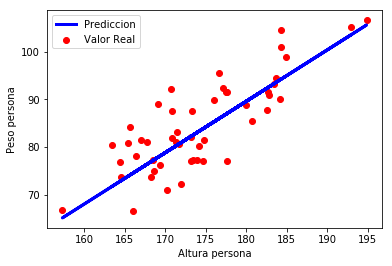

In [16]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_hat, color='blue', linewidth=3)
plt.legend(['Prediccion', 'Valor Real'])
plt.ylabel('Peso persona')
plt.xlabel('Altura persona')

# Taller Medidas de Desempeño

<font size="4">
<p>Tomando los datos del cojunto de altura y pesos de personas. Debe ejecutar cada una de las siguientes tareas.
</p>
</font>

<font size="4">
<p>1. Implemente usted mismo el algoritmo para calcular el Error Medio Cuadrático y compare el resultado contra el dado por sklearn ustilizando la misma partición de de datos.
</p>
</font>

In [21]:
emc = 0
for e in zip(y_test, y_hat):
    emc += ( e[0] - e[1] ) ** 2
emc = emc/len(y_test)
print('El error medio cuadratico es de: ', emc)

El error medio cuadratico es de:  31.963598433


<font size="4">
<p>2. Implemente usted mismo el algoritmo para calcular Coeficiente de Determinación o Bondad de Ajuste y compare con sklearn.
</p>
</font>

In [22]:
c1 = c2 = 0
for e in zip(y_test, y_hat):
    c1 += ( e[1] - e[0] ) ** 2
    c2 += ( e[0] - np.mean(y_test) ) ** 2
coef_det = 1 - c1/c2
print('El Coeficiente de Determinacion es de: ', coef_det)

El Coeficiente de Determinacion es de:  0.640240416951


<font size="4">
<p>3. Implemente usted mismo el algoritmo para calcular el Error Estandar.</p>
</font>

In [24]:
error = 0
for e in zip(y_test, y_hat):
    error += ( e[0] - e[1] ) ** 2
std_error = ( (1.0/(len(y_test)-2)) * error)**1/2
print('El Error Estandar es de: ', std_error)

El Error Estandar es de:  16.6477075172


# Quiz Medidas de Desempeño

<font size="4">
<p>1.Tomando como medida de desempeño el error medio cuadrado para un regresor lineal, ¿qué tipo de problema puede tenerse?
</p>
</font>

<font size="4">
<p>El error medio cuadrático por ser un promedio puede verse afectado por los valores extremos de los errores.
</p>
</font>

<font size="4">
<p>2. ¿Cuando se evalua un modelo qué se desea medir?
</p>
</font>

- Desempeño
- Error
- Precisión
- Costo
- Complejidad


# Referencias

* Calculate a Simple Linear Regression - Documentation. (n.d.). Retrieved August 21, 2017, from https://help.gooddata.com/display/doc/Calculate a Simple Linear Regression

* 4.4 Evaluating the regression model. (n.d.). Retrieved August 21, 2017, from https://www.otexts.org/fpp/4/4

* G. (n.d.). Evaluate model performance in Machine Learning. Retrieved August 21, 2017, from https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-evaluate-model-performance

* Coeficiente de determinación. (2017, August 17). Retrieved August 21, 2017, from https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n

* The Coefficient of Determination, r-squared. (n.d.). Retrieved August 21, 2017, from https://onlinecourses.science.psu.edu/stat501/node/255


* Online Statistics Book. Retrieved August 21, 2017, from http://onlinestatbook.com/2/regression/accuracy.html 



https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
https://www.slideshare.net/mlvlc/l2-evaluating-machine-learning-algorithms-i